C:\Users\bdgyb\AppData\Local\Temp\ipykernel_19252\1816420474.py:7: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  crashes_df = pd.read_csv('Motor_Vehicles_Collisions.csv')
C:\Users\bdgyb\AppData\Local\Temp\ipykernel_19252\1816420474.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['STREET NAME'] = (filtered['ON STREET NAME'].str.strip().str.lower())


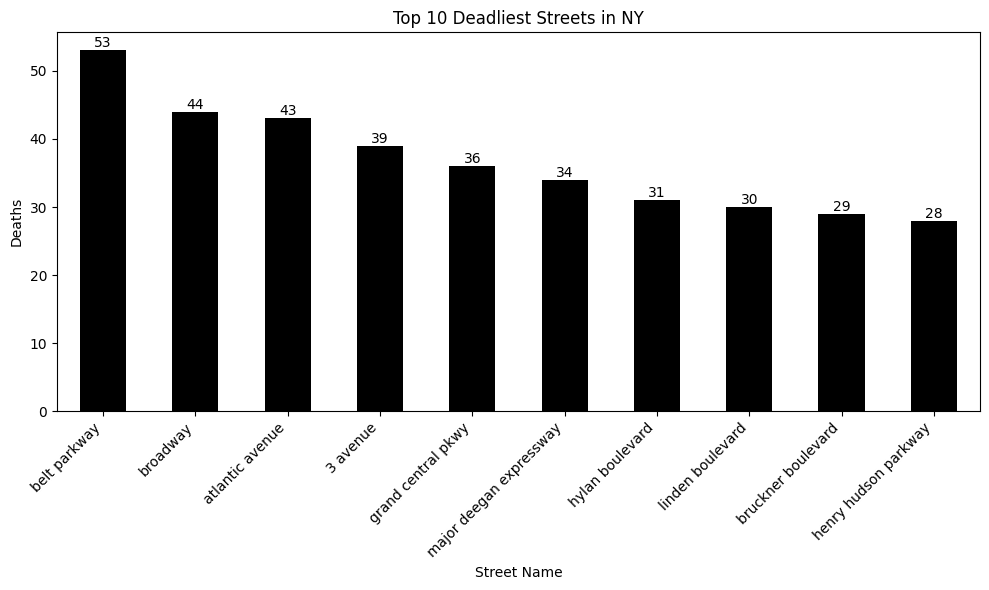

In [1]:
import pandas as pd
from datetime import datetime
import string
import matplotlib.pyplot as plt

#TOP 10 MOST DEADLY ROADS IN NY
crashes_df = pd.read_csv('Motor_Vehicles_Collisions.csv')
#crashes_df.shape
#crashes_df.columns
#print(crashes_df)
crashes_ndf= crashes_df[['NUMBER OF PERSONS KILLED', 'ON STREET NAME']]
#print(crashes_ndf)
mask = crashes_ndf['NUMBER OF PERSONS KILLED'] != 0.0
mask &= crashes_ndf['NUMBER OF PERSONS KILLED'].notnull()
mask &= crashes_ndf['ON STREET NAME'] != 0.0
mask &= crashes_ndf['ON STREET NAME'].notnull()
filtered = crashes_ndf[mask]
#print(filtered)
filtered['STREET NAME'] = (filtered['ON STREET NAME'].str.strip().str.lower())
crashes_normdf= filtered[['STREET NAME', 'NUMBER OF PERSONS KILLED' ]]
#print(crashes_normdf)
summed_deaths = (crashes_normdf .groupby('STREET NAME', as_index=False).agg({'NUMBER OF PERSONS KILLED': 'sum'}))
#print(summed_deaths)
summed_deaths = summed_deaths.sort_values(by='NUMBER OF PERSONS KILLED', ascending=False)
summed_deaths = summed_deaths.reset_index(drop=True)
#print(summed_deaths)

summed_deaths_top=summed_deaths.head(10)
ax = summed_deaths_top.plot.bar(
    x='STREET NAME',
    y='NUMBER OF PERSONS KILLED',
    figsize=(10,6),
    legend=False,
    color='black'
)

ax.set_xlabel('Street Name')
ax.set_ylabel('Deaths')
ax.set_title('Top 10 Deadliest Streets in NY')
plt.xticks(rotation=45, ha='right')

for p in ax.patches:
    ax.annotate(
        str(int(p.get_height())),
        (p.get_x() + p.get_width() / 2, p.get_height()),
        ha='center', va='bottom'
    )

plt.tight_layout()
plt.show()
#TOP 10 MOST DEADLY ROADS IN NY

C:\Users\bdgyb\AppData\Local\Temp\ipykernel_19252\2683757592.py:6: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  crashes_df = pd.read_csv('Motor_Vehicles_Collisions.csv')
C:\Users\bdgyb\AppData\Local\Temp\ipykernel_19252\2683757592.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['CRASH DATE'] = pd.to_datetime(filtered_df['CRASH DATE'])
C:\Users\bdgyb\AppData\Local\Temp\ipykernel_19252\2683757592.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-ver

Weekday Injuries: 2          1.0
3          0.0
4          0.0
5          0.0
6          0.0
          ... 
2186463    2.0
2186464    0.0
2186465    0.0
2186466    0.0
2186467    2.0
Name: NUMBER OF PERSONS INJURED, Length: 1627311, dtype: float64
Weekend Injuries: 0          2.0
1          1.0
9          0.0
24         1.0
26         0.0
          ... 
2186438    1.0
2186445    0.0
2186447    1.0
2186456    0.0
2186460    0.0
Name: NUMBER OF PERSONS INJURED, Length: 559120, dtype: float64
T-Test Results:
T-statistic: -37.02418317205035
P-value: 1.0
Hypothesis Testing Conclusion based on T-Test results:
Difference in injuries is not statistically significant between weekdays and weekends - We fail to reject the null hypothesis.


C:\Users\bdgyb\AppData\Local\Temp\ipykernel_19252\2683757592.py:45: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['DAY_TYPE'] = filtered_df['IS_WEEKEND'].map({True: 'Weekend', False: 'Weekday'})


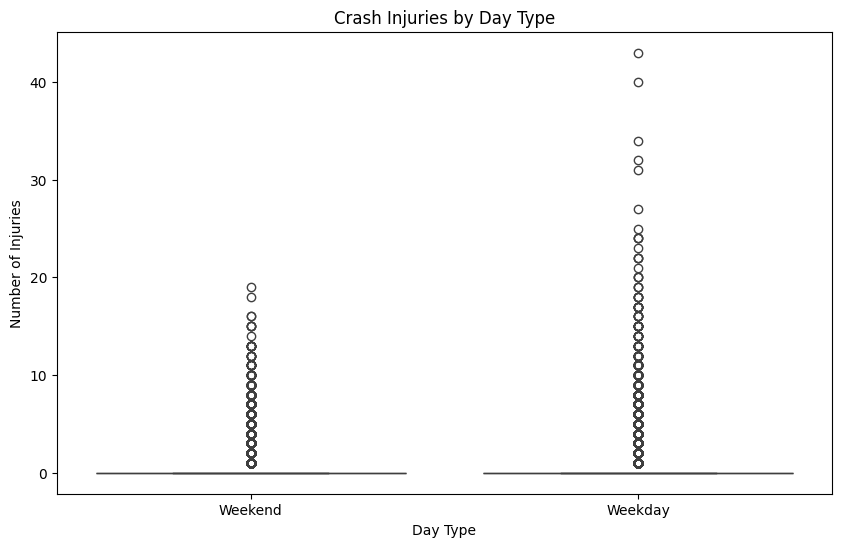

In [2]:
# Hypothesis Testing if Frequency of Injuries has a relationship to Weekend / Weekday
# Hypothesis: Do weekday crashes result in more injuries per crash than weekend crashes?
  # Null Hypothesis: There is no statistical difference in mean injuries for weekday crashes vs weekend crashes
  # Alternate Hypothesis: Weekday crashes result in more injuries compared to Weekend crashes.

crashes_df = pd.read_csv('Motor_Vehicles_Collisions.csv')
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt

# Drop rows with missing data for injuries
filtered_df = crashes_df.dropna(subset = ['NUMBER OF PERSONS INJURED', 'NUMBER OF PERSONS KILLED'])

filtered_df['CRASH DATE'] = pd.to_datetime(filtered_df['CRASH DATE'])

# Colums for day of week and weekday/weekend to help filter
filtered_df['DAY_OF_WEEK'] = filtered_df['CRASH DATE'].dt.dayofweek
filtered_df['IS_WEEKEND'] = filtered_df['DAY_OF_WEEK'] >= 5

# Split injury data into two groups: weekday vs weekend
weekday_injuries = filtered_df[filtered_df['IS_WEEKEND'] == False]['NUMBER OF PERSONS INJURED']
weekend_injuries = filtered_df[filtered_df['IS_WEEKEND'] == True]['NUMBER OF PERSONS INJURED']

print(f"Weekday Injuries: {weekday_injuries}")
print(f"Weekend Injuries: {weekend_injuries}")

# Use a T-test because we are comparing two group means.
# One-tailed because we want to see if weekday crashes result in MORE injuries than weekend crashes (average).
t_statistic, p_value = stats.ttest_ind(weekday_injuries, weekend_injuries, alternative = 'greater')

# Print the result
print("T-Test Results:")
print(f"T-statistic: {t_statistic}")
print(f"P-value: {p_value}")

# Interpret the Result:
print("Hypothesis Testing Conclusion based on T-Test results:")
if p_value < 0.05:
  print("Difference in injuries is statistically significant between weekdays and weekends - We reject the null hypothesis.")
else:
  print("Difference in injuries is not statistically significant between weekdays and weekends - We fail to reject the null hypothesis.")


# Create a box plot plot to visualize the data
filtered_df['DAY_TYPE'] = filtered_df['IS_WEEKEND'].map({True: 'Weekend', False: 'Weekday'})
plt.figure(figsize = (10, 6))
sns.boxplot(x = 'DAY_TYPE', y = 'NUMBER OF PERSONS INJURED', data = filtered_df)
plt.title('Crash Injuries by Day Type')
plt.xlabel('Day Type')
plt.ylabel('Number of Injuries')
plt.show()


# Based on this Hypothesis test, we fail to reject the null hypothesis.
# The T-statistic of -4.81 and P-Value of 0.99 tell us there is no statistically significant increase in mean crashes for weekdays compared to weekends.


